## training with no hidden layer

$$
  z_i = S(u_i) \\
  u_i = w_{ij} z_j
$$

$$
  \frac{\partial E}{\partial w_{ij}} =
  \frac{\partial E}{\partial z_i} \cdot \frac{\partial z_i}{\partial u_i} \cdot \frac{\partial u_i}{\partial w_{ij}} = (z_i - t_i) \cdot z_i (1 - z_i) \cdot z_j
$$

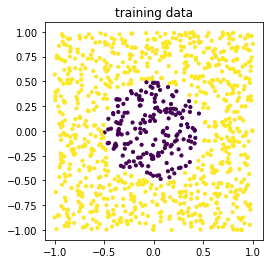

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import graphviz

ALPHA     = 1.0e-1
BATCHSIZE = 5
MAX_EPOCH = 2000
OUT_EPOCH = 50
TYPE      = "x" # x, circle, stripe, chess, diagonal, occ (off-centered-circle), sin

url = "https://raw.githubusercontent.com/daiki-matsunaga/MathMeasurement/main/lec06/data/"

def Sigmoid(vec):
    return 1.0/(1.0 + np.exp(-vec))

class FeedForward():
    def __init__(self):
        np.random.seed(0) # set random seed

        self.data    = np.loadtxt(url + TYPE + "/training.dat") # read data
        self.numData = self.data.shape[0]                       # number of data
#        self.numData = 500                                      # number of data
        self.l2      = []                                       # l2 time history

        self.num_i = 1  # number of output layer
        self.num_j = 2  # number of input layer

        # set random weight
        self.w_ij = np.random.normal(0.0, 5.0, (self.num_i, self.num_j))

        # show training data
        fig, ax = plt.subplots()
        ax.scatter(self.data[:self.numData, 0], self.data[:self.numData, 1], c=self.data[:self.numData, 2], s = 10.0)
        ax.set_aspect('equal')
        ax.set_title('training data')
        plt.show()

    def Forward(self, zj):
        zi = Sigmoid(self.w_ij@zj)  # layer j -> layer i (output layer)
        return zi, zj

    def UpdateWeight(self):
        l2 = 0.0 # initialize L2 error

        # initialize derivatives 
        d_w_ij = np.zeros([self.num_i, self.num_j])

        for idd in range(self.numData): 
            zi, zj = self.Forward([self.data[idd, 0], self.data[idd, 1]]) # forward propagation
            ti = self.data[idd, 2]                                        # read test data
            l2 += (zi - ti)**2.0/self.numData                             # calculate l2 error

            # backward propagation
            e_ui = (zi - ti)*zi*(1.0 - zi) 

            d_w_ij += e_ui*zj

            # update with batch size
            if (idd + 1)%BATCHSIZE == 0: 
                self.w_ij -= ALPHA*d_w_ij
                
                d_w_ij.fill(0.0)

        self.l2.append(l2)
        return l2


ml = FeedForward() # constructor

### training

Epoch     0 - L2 error: 4.258104e-01
Epoch    50 - L2 error: 2.506845e-01
Epoch   100 - L2 error: 2.506845e-01
Epoch   150 - L2 error: 2.506845e-01
Epoch   200 - L2 error: 2.506845e-01
Epoch   250 - L2 error: 2.506845e-01
Epoch   300 - L2 error: 2.506845e-01
Epoch   350 - L2 error: 2.506845e-01
Epoch   400 - L2 error: 2.506845e-01
Epoch   450 - L2 error: 2.506845e-01
Epoch   500 - L2 error: 2.506845e-01
Epoch   550 - L2 error: 2.506845e-01
Epoch   600 - L2 error: 2.506845e-01
Epoch   650 - L2 error: 2.506845e-01
Epoch   700 - L2 error: 2.506845e-01
Epoch   750 - L2 error: 2.506845e-01
Epoch   800 - L2 error: 2.506845e-01
Epoch   850 - L2 error: 2.506845e-01
Epoch   900 - L2 error: 2.506845e-01
Epoch   950 - L2 error: 2.506845e-01
Epoch  1000 - L2 error: 2.506845e-01
Epoch  1050 - L2 error: 2.506845e-01
Epoch  1100 - L2 error: 2.506845e-01
Epoch  1150 - L2 error: 2.506845e-01
Epoch  1200 - L2 error: 2.506845e-01
Epoch  1250 - L2 error: 2.506845e-01
Epoch  1300 - L2 error: 2.506845e-01
E

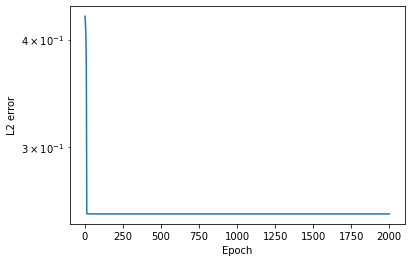

In [5]:
for epoch in range(MAX_EPOCH+1): # training
    l2 = ml.UpdateWeight()
    if(epoch%OUT_EPOCH == 0): print("Epoch %5d - L2 error: %e" % (epoch, l2))

fig, ax = plt.subplots() # show training process
ax.plot(ml.l2)
ax.set_xlabel("Epoch")
ax.set_ylabel("L2 error")
ax.set_yscale('log')
plt.show()

### evaluation test

Test data - L2 error: [0.2509364]
Test data - correct rate: 0.50

 w_ij = 
 [[0.11949968 0.17085314]]


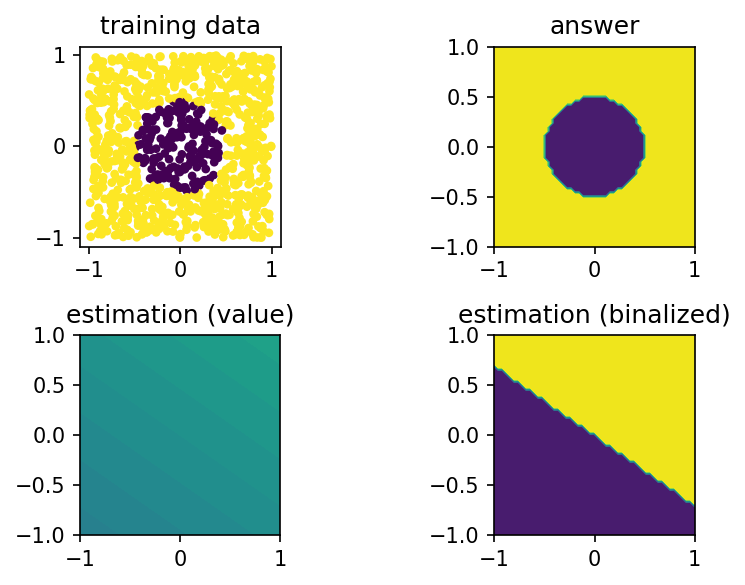

In [6]:
# test
test = np.loadtxt(url + TYPE + "/test.dat") # read test data
numTestData = test.shape[0]
tx, ty, label = test[:, 0], test[:, 1], test[:, 2]

l2 = 0.0 # initialize L2 error
count = 0
y   = np.array([])
zis = np.array([])

for td in test: 
    # forward
    zi, zj = ml.Forward([td[0], td[1]])

    ti = td[2] # read test data
    yi = 1.0 if zi > 0.5 else 0.0

    y = np.append(y, yi)
    zis = np.append(zis, zi)

    # add l2 error
    l2 += (zi - ti)**2.0/numTestData
    count += 1 if ti == yi else 0

print("Test data - L2 error:", l2)
print("Test data - correct rate: %.2f" % (count/numTestData))

print("\n w_ij = \n", ml.w_ij)

# show training data
fig, ax = plt.subplots(2, 2)
fig.set_dpi(150)
ax[0,0].scatter(ml.data[:ml.numData, 0], ml.data[:ml.numData, 1], c=ml.data[:ml.numData, 2], s = 10.0)
ax[0,0].set_aspect('equal')
ax[0,0].set_title('training data')

ax[0,1].contourf(tx.reshape(51, 51), ty.reshape(51, 51), label.reshape(51, 51), vmin=0, vmax=1)
ax[0,1].set_aspect('equal')
ax[0,1].set_title('answer')

ax[1,0].contourf(tx.reshape(51, 51), ty.reshape(51, 51), zis.reshape(51, 51), vmin=0, vmax=1)
ax[1,0].set_aspect('equal')
ax[1,0].set_title('estimation (value)')

ax[1,1].contourf(tx.reshape(51, 51), ty.reshape(51, 51), y.reshape(51, 51), vmin=0, vmax=1)
ax[1,1].set_aspect('equal')
ax[1,1].set_title('estimation (binalized)')

fig.tight_layout()
plt.show()

### show network

In [7]:
g = graphviz.Digraph()

scale = 0.2
g.attr('node', shape='circle', fontsize="9", labelfontsize="1")

for j in range(ml.num_j): 
    for i in range(ml.num_i): 
        if ml.w_ij[i, j] >= 0.0:
            g.edge('zj' + str(j), 'zi' + str(i), penwidth=str(scale*abs(ml.w_ij[i, j])), color="red")
        else:
            g.edge('zj' + str(j), 'zi' + str(i), penwidth=str(scale*abs(ml.w_ij[i, j])), color="blue") 

graphviz.Source(g)

AttributeError: 'Digraph' object has no attribute 'splitlines'

### test value: change (tx, ty) and check whether the system is working correctly

In [ ]:
tx = 0.5
ty = 0.0

answer, _ = ml.Forward([tx, ty])
print(answer)